In [1]:
from itertools import product

import astropy
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
from ipywidgets import IntSlider, interact
from matplotlib.animation import FuncAnimation, HTMLWriter, PillowWriter
from matplotlib.colors import Normalize, rgb_to_hsv
from rich import print

In [2]:
import RomanTools as rst

In [3]:
%matplotlib widget

In [4]:
params = rst.RomanInputParams()
print(params)

RomanInputParams(
    pixel_dimension=10.0,
    n_refl=5,
    em_z306=0.9,
    em_z307=0.97,
    em_ag=0.02,
    em_au=0.025,
    em_mli=0.1,
    em_glass=0.01,
    em_al=0.024,
    em_mir=0.02,
    mir_surf='Roman_OTA',
    sm_d=0.716,
    sm_clear_aperture_d=0.574,
    sm_surf_temp=265.0,
    sm_th_emis_tput=1.0,
    sm_fnum_inner=1000000.0,
    sm_to_eap_dist=3.2758,
    sm_fnum_outer=5.706968641114983,
    pm_d=2.36312,
    pm_surf_temp=264.0,
    pm_th_emis_tput=1.0,
    pm_apstop_od=2.56312,
    pm_apstop_temp=265.0,
    pm_apstop_th_emis_tput=1.0,
    exit_pupil_diam=0.0883226,
    pupil_mag=26.7555529388854,
    pm_baffle1_od=0.704,
    pm_baffle1_id=0.6,
    pm_baffle1_temp=240.0,
    pm_baffle1_th_emis_tput=1.0,
    pm_to_fpa_dist=4.634,
    pm_baffle2_id=0.6,
    pm_baffle2_od=0.65532,
    pm_baffle2_fnum_inner=7.7233333333333345,
    pm_baffle2_fnum_outer=7.071354452786426,
    pm_baffle2_temp=260.0,
    pm_baffle2_th_emis_tput=1.0,
    sm_baffle_temp=265.0,
    sm_baffle_th_emis_tput=1.0,
    n_legs=6.0,
    smst_width=0.076,
    smst_length=0.82356,
    smst_area=0.37554335999999994,
    smst_total_obsc_frac=0.085624619508347,
    smst_azim_frac=0.09427973453441799,
    smst_th_emis_tput=1.0,
    smst_temp=269.0,
    smst_zone_names=['SMST_cold_zone', 'SMST_med_zone', 'SMST_warm_zone'],
    smst_zone_types=['pupilstop', 'pupilstop', 'pupilstop'],
    smst_zone_materials=['Z307+MLI', 'Z307+MLI', 'Z307+MLI'],
    temp_269=[233.0, 241.0, 260.0],
    temp_293=[236.0, 248.0, 275.0],
    tslope=[0.125, 0.2916666666666667, 0.625],
    smst_zone_temps=[233.0, 241.0, 260.0],
    smst_zone_frac_area=[0.64, 0.32, 0.04],
    smst_zone_emis=[0.6742, 0.6742, 0.6742],
    smst_zone_th_emis_tput=[1.0, 1.0, 1.0],
    smst_zone_tput_fac=[1.0, 1.0, 1.0],
    aom_temp=220.0,
    fm1_temp=221.0,
    fm2_temp=214.0,
    filter_temp=188.0,
    det_housing_temp=140.0,
    m_tput_fac=0.9939266761482027,
    det_tput_fac=1.0,
    coba_hole_distance=0.57,
    coba_hole_radius=0.1221,
    fno_coba=2.334152334152334,
    pupil_distance=0.693690124213975,
    grism_rear_surf_distance=0.6288396611013016,
    aperture_dist_to_fpa=0.6288396611013016,
    aperture_id=0.10254,
    aperture_od=0.11596,
    aperture_fno=5.422901527262002,
    aperture_fni=6.132627863285562,
    sfnid=100000.0,
    dark_current=0.005,
    filt_tmax=0.95,
    img_dw=0.005,
    max_open_area=4.385927343751765
)

In [39]:
list(rst.InstrumentMode)

[<InstrumentMode.ImageOnly: 1>,
 <InstrumentMode.GrismSpec: 2>,
 <InstrumentMode.PrismSpec: 3>]

In [6]:
telescope = rst.roman_telescope(rst.ImageOnly, sca=0, roman_input_param=params)

In [7]:
print(telescope)

Telescope(
    telescope='Roman OTA',
    instrument_name='Wide-Field Instrument',
    mode_type=<InstrumentMode.ImageOnly: 1>,
    mode='broad band filters',
    sca=0,
    opt_elem=<Table length=18>
       Name           Type     Material   Emissivity Temperature     Fnum Outer         Fnum Inner     Throughput 
Factor  Obscuration Azim Frac Thermal_emission_throughput Filter Dependent Thermal Zone
      str18           str9      str12      float64     float64        float64            float64            float64
float64                  float64                 bool         float64   
------------------ --------- ------------ ---------- ----------- ------------------ ------------------ 
------------------ --------------------- --------------------------- ---------------- ------------
        PM_AP_STOP pupilstop         Z307       0.97       265.0  7.368007261985374  7.991590259208146             
1.0                   1.0                         1.0             True          1.0
         SM_BAFFLE pupilstop         Z307       0.97       265.0 26.375819515837925 32.900848037177624             
1.0                   1.0                         1.0             True          1.0
    SMST_cold_zone pupilstop     Z307+MLI     0.6742       233.0  7.991590259208146 26.375819515837925             
1.0   0.06033903010202751                         1.0             True          1.0
     SMST_med_zone pupilstop     Z307+MLI     0.6742       241.0  7.991590259208146 26.375819515837925             
1.0  0.030169515051013757                         1.0             True          1.0
    SMST_warm_zone pupilstop     Z307+MLI     0.6742       260.0  7.991590259208146 26.375819515837925             
1.0 0.0037711893813767196                         1.0             True          1.0
                PM    mirror    Roman_OTA       0.02       264.0  7.991590259208146 26.375819515837925 
0.9939266761482027                   1.0                         1.0             True          1.0
                SM    mirror    Roman_OTA       0.02       265.0  5.706968641114983          1000000.0 
0.9939266761482027                   1.0                         1.0             True          1.0
  PM_INNER_BAFFLE1 pupilstop         Z307       0.97       240.0 26.825407348494252 31.475144622233255             
1.0                   1.0                         1.0             True          1.0
  PM_INNER_BAFFLE2 pupilstop         Z307       0.97       260.0  7.071354452786426 7.7233333333333345             
1.0                   1.0                         1.0             True          1.0
               FM1    mirror    Roman_OTA       0.02       221.0  6.132627863285562           100000.0 
0.9939266761482027                   1.0                         1.0             True          2.0
        Field Stop fieldstop         none       0.01       220.0  6.132627863285562           100000.0             
1.0                   1.0                         1.0             True          2.0
               FM2    mirror    Roman_OTA       0.02       214.0  6.132627863285562           100000.0 
0.9939266761482027                   1.0                         1.0             True          2.0
                TM    mirror    Roman_OTA       0.02       220.0  6.132627863285562           100000.0 
0.9939266761482027                   1.0                         1.0             True          2.0
        Pupil Mask pupilstop         Z307       0.97       188.0  6.132627863285562           100000.0             
1.0    6.0942797345344175                         1.0             True          2.0
            Filter    filter fused silica       0.01       188.0  6.132627863285562           100000.0             
1.0                   1.0                         1.0            False          3.0
      EWA aperture   housing           Al      0.024       188.0  5.422901527262002  6.132627863285562             
1.0                   1.0                         1.0            False   

In [8]:
telescope.opt_elem

Name,Type,Material,Emissivity,Temperature,Fnum Outer,Fnum Inner,Throughput Factor,Obscuration Azim Frac,Thermal_emission_throughput,Filter Dependent,Thermal Zone
str18,str9,str12,float64,float64,float64,float64,float64,float64,float64,bool,float64
PM_AP_STOP,pupilstop,Z307,0.97,265.0,7.368007261985374,7.991590259208146,1.0,1.0,1.0,True,1.0
SM_BAFFLE,pupilstop,Z307,0.97,265.0,26.375819515837925,32.900848037177624,1.0,1.0,1.0,True,1.0
SMST_cold_zone,pupilstop,Z307+MLI,0.6742,233.0,7.991590259208146,26.375819515837925,1.0,0.06033903010202751,1.0,True,1.0
SMST_med_zone,pupilstop,Z307+MLI,0.6742,241.0,7.991590259208146,26.375819515837925,1.0,0.030169515051013757,1.0,True,1.0
SMST_warm_zone,pupilstop,Z307+MLI,0.6742,260.0,7.991590259208146,26.375819515837925,1.0,0.0037711893813767196,1.0,True,1.0
PM,mirror,Roman_OTA,0.02,264.0,7.991590259208146,26.375819515837925,0.9939266761482027,1.0,1.0,True,1.0
SM,mirror,Roman_OTA,0.02,265.0,5.706968641114983,1000000.0,0.9939266761482027,1.0,1.0,True,1.0
PM_INNER_BAFFLE1,pupilstop,Z307,0.97,240.0,26.825407348494252,31.475144622233255,1.0,1.0,1.0,True,1.0
PM_INNER_BAFFLE2,pupilstop,Z307,0.97,260.0,7.071354452786426,7.7233333333333345,1.0,1.0,1.0,True,1.0


In [9]:
telescope.filters

Filter Name,Low,Low_width,High,High_width,Transmission,Expupil Rim Outer Diam,Expupil Rim Inner Diam,Expupil Center Outer Diam,Expupil Leg Width,Pupil Obscuration,Relative Pupil Obscuration
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
F062,0.48178,0.4713,0.76122,0.77416,0.95,0.11596,0.095,0.024,0.001,0.2156,1.685303722000545
F087,0.76251,0.75215,0.9835900000000001,0.9931900000000001,0.95,0.11596,0.095,0.024,0.001,0.2156,1.685303722000545
F106,0.93447,0.9236300000000001,1.2003,1.2144599999999999,0.95,0.11596,0.095,0.024,0.001,0.2156,1.685303722000545
F129,1.12836,1.11776,1.45359,1.4655099999999999,0.95,0.11596,0.095,0.024,0.001,0.2156,1.685303722000545
F146,0.92768,0.9145399999999999,2.00226,2.0182800000000003,0.95,0.11596,0.095,0.024,0.001,0.2156,1.685303722000545
F158,1.3864400000000001,1.3707,1.7849300000000001,1.8052700000000002,0.95,0.11596,0.0886,0.0342,0.003,0.29379999999999995,1.6831456851694349
F184,1.6836300000000002,1.6648500000000002,2.00534,2.0341,0.95,0.11596,0.095,0.024,0.001,0.2156,1.685303722000545
F213,1.9634,1.94342,2.31295,2.3392899999999996,0.95,0.11596,0.0886,0.0342,0.003,0.29379999999999995,1.6831456851694349


In [10]:
telescope.fdep_fnum_outer

Filter Name,PM_AP_STOP,SM_BAFFLE,SMST_cold_zone,SMST_med_zone,SMST_warm_zone,PM,SM,PM_INNER_BAFFLE1,PM_INNER_BAFFLE2,FM1,Field Stop,FM2,TM,Pupil Mask,Filter,EWA aperture,Detector Enclosure,Detector
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
F062,7.368007261985374,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,5.706968641114983,7.429873998188815,7.071354452786426,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,6.132627863285562,5.422901527262002,0.0,0.0
F087,7.368007261985374,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,5.706968641114983,7.429873998188815,7.071354452786426,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,6.132627863285562,5.422901527262002,0.0,0.0
F106,7.368007261985374,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,5.706968641114983,7.429873998188815,7.071354452786426,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,6.132627863285562,5.422901527262002,0.0,0.0
F129,7.368007261985374,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,5.706968641114983,7.429873998188815,7.071354452786426,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,6.132627863285562,5.422901527262002,0.0,0.0
F146,7.368007261985374,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,5.706968641114983,7.429873998188815,7.071354452786426,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,6.132627863285562,5.422901527262002,0.0,0.0
F158,7.368007261985374,7.966569185416901,7.966569185416901,7.966569185416901,7.966569185416901,7.966569185416901,5.706968641114983,7.966569185416901,7.071354452786426,7.829459641241253,7.829459641241253,7.829459641241253,7.829459641241253,7.829459641241253,6.132627863285562,5.422901527262002,0.0,0.0
F184,7.368007261985374,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,7.429873998188815,5.706968641114983,7.429873998188815,7.071354452786426,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,7.302001307515527,6.132627863285562,5.422901527262002,0.0,0.0
F213,7.368007261985374,7.966569185416901,7.966569185416901,7.966569185416901,7.966569185416901,7.966569185416901,5.706968641114983,7.966569185416901,7.071354452786426,7.829459641241253,7.829459641241253,7.829459641241253,7.829459641241253,7.829459641241253,6.132627863285562,5.422901527262002,0.0,0.0


In [11]:
telescope.fdep_fnum_inner

Filter Name,PM_AP_STOP,SM_BAFFLE,SMST_cold_zone,SMST_med_zone,SMST_warm_zone,PM,SM,PM_INNER_BAFFLE1,PM_INNER_BAFFLE2,FM1,Field Stop,FM2,TM,Pupil Mask,Filter,EWA aperture,Detector Enclosure,Detector
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
F062,7.991590259208146,29.40991790949739,26.375819515837925,26.375819515837925,26.375819515837925,26.375819515837925,29.40991790949739,29.40991790949739,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,3.680108333333333,6.132627863285562,5.422901527262002,0.0,0.0
F087,7.991590259208146,29.40991790949739,26.375819515837925,26.375819515837925,26.375819515837925,26.375819515837925,29.40991790949739,29.40991790949739,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,3.680108333333333,6.132627863285562,5.422901527262002,0.0,0.0
F106,7.991590259208146,29.40991790949739,26.375819515837925,26.375819515837925,26.375819515837925,26.375819515837925,29.40991790949739,29.40991790949739,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,3.680108333333333,6.132627863285562,5.422901527262002,0.0,0.0
F129,7.991590259208146,29.40991790949739,26.375819515837925,26.375819515837925,26.375819515837925,26.375819515837925,29.40991790949739,29.40991790949739,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,3.680108333333333,6.132627863285562,5.422901527262002,0.0,0.0
F146,7.991590259208146,29.40991790949739,26.375819515837925,26.375819515837925,26.375819515837925,26.375819515837925,29.40991790949739,29.40991790949739,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,3.680108333333333,6.132627863285562,5.422901527262002,0.0,0.0
F158,7.991590259208146,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,2.58253216374269,6.132627863285562,5.422901527262002,0.0,0.0
F184,7.991590259208146,29.40991790949739,26.375819515837925,26.375819515837925,26.375819515837925,26.375819515837925,29.40991790949739,29.40991790949739,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,3.680108333333333,6.132627863285562,5.422901527262002,0.0,0.0
F213,7.991590259208146,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,20.63853888385782,7.7233333333333345,100000.0,100000.0,100000.0,100000.0,2.58253216374269,6.132627863285562,5.422901527262002,0.0,0.0


In [12]:
telescope.fdep_solid_angle

Filter Name,PM_AP_STOP,SM_BAFFLE,SMST_cold_zone,SMST_med_zone,SMST_warm_zone,PM,SM,PM_INNER_BAFFLE1,PM_INNER_BAFFLE2,FM1,Field Stop,FM2,TM,Pupil Mask,Filter,EWA aperture,Detector Enclosure,Detector
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
F062,0.0005102395898391746,0.0002551197949195873,3.188997436494841e-05,0.01280662658184104,0.01280662658184104,0.01280662658184104,0.02263741064758338,0.013023314452309323,0.0024753141614403643,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.0085996464410096,0.0,0.0,0.0,0.0
F087,0.0005102395898391746,0.0002551197949195873,3.188997436494841e-05,0.01280662658184104,0.01280662658184104,0.01280662658184104,0.02263741064758338,0.013023314452309323,0.0024753141614403643,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.0085996464410096,0.0,0.0,0.0,0.0
F106,0.0005102395898391746,0.0002551197949195873,3.188997436494841e-05,0.01280662658184104,0.01280662658184104,0.01280662658184104,0.02263741064758338,0.013023314452309323,0.0024753141614403643,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.0085996464410096,0.0,0.0,0.0,0.0
F129,0.0005102395898391746,0.0002551197949195873,3.188997436494841e-05,0.01280662658184104,0.01280662658184104,0.01280662658184104,0.02263741064758338,0.013023314452309323,0.0024753141614403643,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.0085996464410096,0.0,0.0,0.0,0.0
F146,0.0005102395898391746,0.0002551197949195873,3.188997436494841e-05,0.01280662658184104,0.01280662658184104,0.01280662658184104,0.02263741064758338,0.013023314452309323,0.0024753141614403643,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.0085996464410096,0.0,0.0,0.0,0.0
F158,0.0020349645704094864,0.00990680699277966,0.00990680699277966,0.00990680699277966,0.00990680699277966,0.00990680699277966,0.02089195476831167,0.00990680699277966,0.002380982447124501,0.012056711206274119,0.012056711206274119,0.012056711206274119,0.012056711206274119,0.012061195265589917,0.0,0.0,0.0,0.0
F184,0.0005102395898391746,0.0002551197949195873,3.188997436494841e-05,0.01280662658184104,0.01280662658184104,0.01280662658184104,0.02263741064758338,0.013023314452309323,0.0024753141614403643,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.014404053043274068,0.0085996464410096,0.0,0.0,0.0,0.0
F213,0.0020349645704094864,0.00990680699277966,0.00990680699277966,0.00990680699277966,0.00990680699277966,0.00990680699277966,0.02089195476831167,0.00990680699277966,0.002380982447124501,0.012056711206274119,0.012056711206274119,0.012056711206274119,0.012056711206274119,0.012061195265589917,0.0,0.0,0.0,0.0


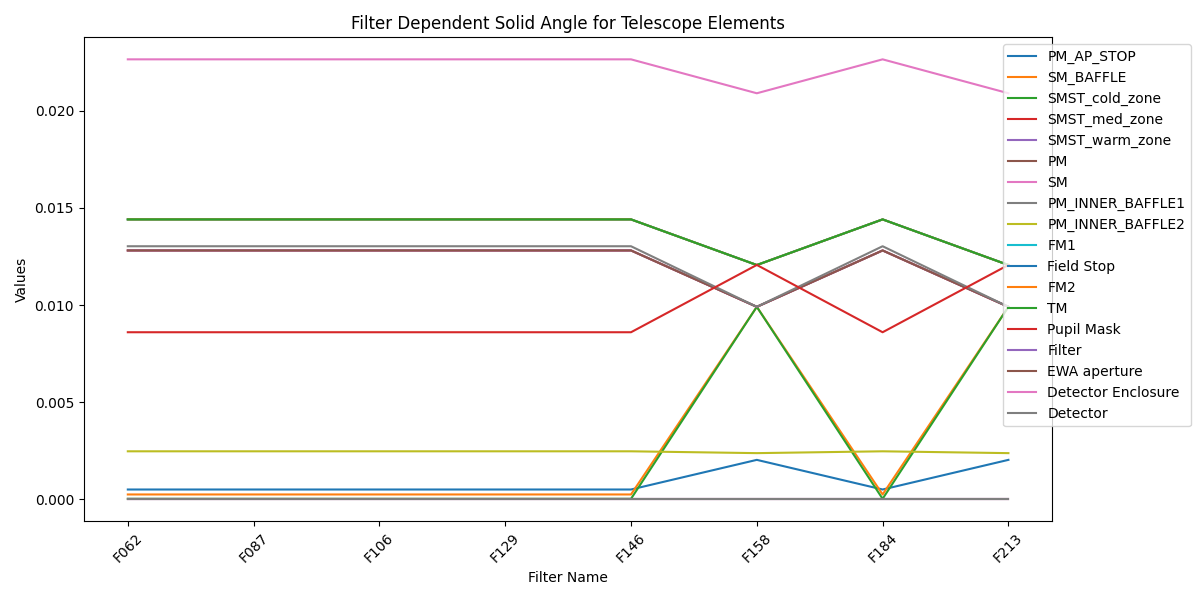

In [13]:
x_labels = telescope.fdep_solid_angle['Filter Name']
plt.figure(figsize=(12, 6))

for c in telescope.fdep_solid_angle.colnames[1:]:
    plt.plot(x_labels, telescope.fdep_solid_angle[c], label=c)

# Add title and labels
plt.title('Filter Dependent Solid Angle for Telescope Elements')
plt.xlabel('Filter Name')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # Place legend outside the plot

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
print(telescope.instrument.w_spect)

[[0.4713     0.47626492 0.48122984 ... 0.         0.         0.        ]
 [0.75215    0.75706918 0.76198837 ... 0.         0.         0.        ]
 [0.92363    0.92855932 0.93348864 ... 0.         0.         0.        ]
 ...
 [1.3707     1.37569506 1.38069011 ... 0.         0.         0.        ]
 [1.66485    1.66983986 1.67482973 ... 0.         0.         0.        ]
 [1.94342    1.94836837 1.95331675 ... 0.         0.         0.        ]]

In [15]:
imgtels = [
    rst.roman_telescope(rst.ImageOnly, sca=i, roman_input_param=params)
    for i in range(18)
]
psmtels = [
    rst.roman_telescope(rst.PrismSpec, sca=i, roman_input_param=params)
    for i in range(18)
]
gsmtels = [
    rst.roman_telescope(rst.GrismSpec, sca=i, roman_input_param=params)
    for i in range(18)
]

In [40]:
solid_angles_tables = [t.fdep_solid_angle for t in imgtels]
solid_angles = [
    (
        solid_angles_tables[0]['Filter Name'][row],
        solid_angles_tables[0].colnames[col],
        np.array(
            [t[solid_angles_tables[0].colnames[col]][row] for t in solid_angles_tables]
        ),
    )
    for row, col in product(
        range(len(solid_angles_tables[0])),
        range(1, len(solid_angles_tables[0].colnames)),
    )
]
solid_angles

[('F062',
  'PM_AP_STOP',
  array([0.00051024, 0.00049563, 0.00047963, 0.00050891, 0.00049496,
         0.00047958, 0.00050673, 0.00049443, 0.00048051, 0.00051024,
         0.00049563, 0.00047963, 0.00050891, 0.00049496, 0.00047958,
         0.00050673, 0.00049443, 0.00048051])),
 ('F062',
  'SM_BAFFLE',
  array([0.00025512, 0.00024781, 0.00023981, 0.00025445, 0.00024748,
         0.00023979, 0.00025337, 0.00024722, 0.00024026, 0.00025512,
         0.00024781, 0.00023981, 0.00025445, 0.00024748, 0.00023979,
         0.00025337, 0.00024722, 0.00024026])),
 ('F062',
  'SMST_cold_zone',
  array([3.18899744e-05, 3.09766775e-05, 2.99768317e-05, 3.18068277e-05,
         3.09351112e-05, 2.99734460e-05, 3.16707111e-05, 3.09021645e-05,
         3.00321568e-05, 3.18902653e-05, 3.09766775e-05, 2.99768317e-05,
         3.18068277e-05, 3.09351112e-05, 2.99737282e-05, 3.16707111e-05,
         3.09021645e-05, 3.00321568e-05])),
 ('F062',
  'SMST_med_zone',
  array([0.01280663, 0.01243986, 0.01203833,

In [34]:
def get_optimal_text_color(rgba_color):
    """Determine if the text should be black or white for visibility."""
    rgb_color = rgba_color[:3]
    brightness = rgb_to_hsv(np.array(rgb_color)[None, None, :])[0, 0, 2]
    return 'black' if brightness > 0.75 else 'white'


def update_grid(fig, axes, data, mappable, filter_index, element_index):
    """Update the grid with new data for the selected filter and element."""
    cmap = plt.colormaps['cividis']
    norm = mappable.norm  # Use the existing colorbar's norm

    # Define the index mapping matrix
    romanscaix = np.array(
        [[8, 5, 2, 11, 14, 17], [7, 4, 1, 10, 13, 16], [6, 3, 0, 9, 12, 15]]
    )

    # Unpack the data
    filtr, element, val = data

    # Rearrange values using the index matrix
    val = val[romanscaix]

    # Set the title with the selected filter and element
    fig.suptitle(f'Solid Angle for [{filtr}, {element}]', fontsize=16)

    # Update the mappable object and colorbar limits
    mappable.set_array(val)
    mappable.set_clim(np.min(val), np.max(val))

    # Update each subplot with new data
    for ax, (row, col) in zip(axes, np.ndindex(romanscaix.shape)):
        value = val[row, col]
        color = cmap(norm(value))
        ax.set_facecolor(color)

        # Update the text in the middle of the plot
        ax.texts[0].set_text(f'{value:.3e}')
        ax.texts[0].set_color(get_optimal_text_color(color))


def create_rst_grid_interactive(datasets):
    """
    Create an interactive animation with two sliders to control filters and elements.
    """
    fig = plt.figure(figsize=(9, 6))
    grid = fig.add_gridspec(3, 6, wspace=0.1, hspace=0.1)

    cmap = plt.colormaps['cividis']
    norm = Normalize(vmin=0.0, vmax=np.max([d[2] for d in datasets]))

    # Initialize the grid of plots
    axes = []
    offset_2_3 = 2 / 3
    offset_1_3 = 1 / 3

    for row in range(3):
        for col in range(6):
            ax = fig.add_subplot(grid[row, col])
            ax.set_xticks([])
            ax.set_yticks([])

            # Adjust positions according to the specified offsets
            pos = ax.get_position()
            if col in {0, 5}:
                new_pos = [
                    pos.x0,
                    pos.y0 - pos.height * offset_2_3,
                    pos.width,
                    pos.height,
                ]
            elif col in {1, 4}:
                new_pos = [
                    pos.x0,
                    pos.y0 - pos.height * offset_1_3,
                    pos.width,
                    pos.height,
                ]
            else:
                new_pos = [pos.x0, pos.y0, pos.width, pos.height]
            ax.set_position(new_pos)

            # Add a placeholder text in the center
            ax.text(0.5, 0.5, '', ha='center', va='center', fontsize=14, color='white')
            axes.append(ax)

    # Create a ScalarMappable for the colorbar
    mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

    # Add a colorbar to the figure
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(mappable, cax=cbar_ax)
    cbar.set_label('Solid Angle Value', fontsize=12)

    # Function to update the plot for the selected filter and element
    def update_plot(filter_index, element_index):
        update_grid(
            fig,
            axes,
            datasets[filter_index * 18 + element_index],
            mappable,
            filter_index,
            element_index,
        )
        fig.canvas.draw_idle()

    # Create interactive sliders for filters and elements
    filter_slider = IntSlider(value=0, min=0, max=8 - 1, step=1, description='Filter')
    element_slider = IntSlider(
        value=0, min=0, max=18 - 1, step=1, description='Element'
    )

    # Use interact to connect the sliders to the update function
    interact(update_plot, filter_index=filter_slider, element_index=element_slider)

interactive(children=(IntSlider(value=0, description='Filter', max=7), IntSlider(value=0, description='Element…

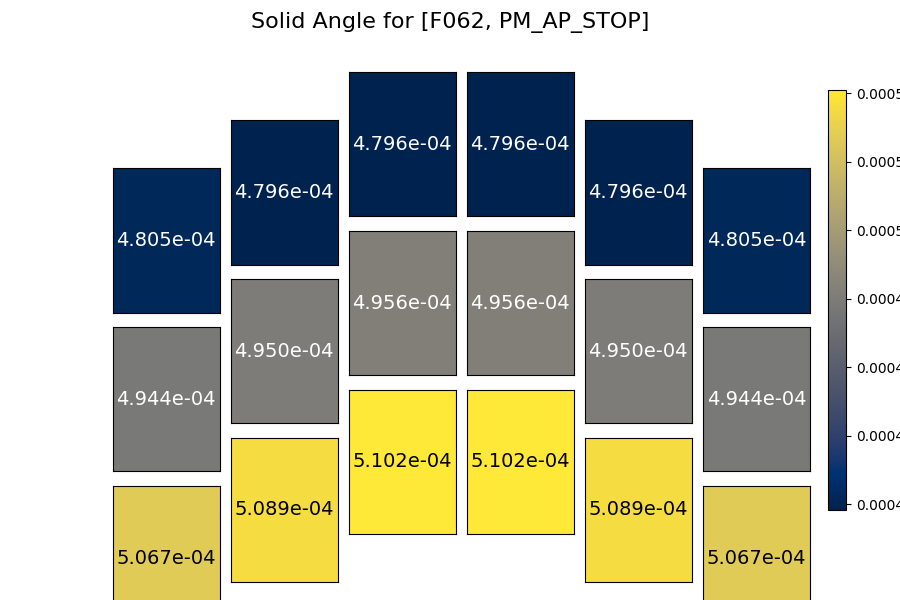

In [35]:
create_rst_grid_interactive(solid_angles)